# List of distributions

In [5]:
import jax; jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from jaxkuramoto import distribution

import matplotlib.pyplot as plt

xs = jnp.arange(-5, 5, 0.01)

## Normal distribution
- Probability density function

$$
p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

- parameters
    - $\mu$: mean (`loc`)
    - $\sigma$: standard deviation (`scale`)

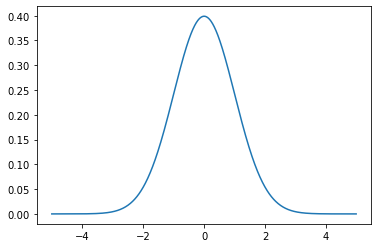

In [6]:
loc = 0.0
scale = 1.0

dist = distribution.Normal(loc=loc, scale=scale)
plt.plot(xs, dist.pdf(xs), label="pdf")

## Cauchy distribution
- Probability density function

$$
p(x)=\frac{\gamma}{\pi}\frac{1}{(x-\mu)^2+\gamma^2}
$$

- parameters
    - $\mu$: location (`loc`)
    - $\gamma$: scale (`gamma`)

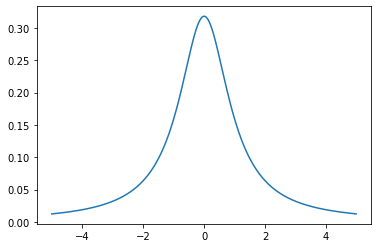

In [8]:
loc = 0.0
gamma = 1.0

dist = distribution.Cauchy(loc=loc, gamma=gamma)
plt.plot(xs, dist.pdf(xs), label="pdf")

## Uniform distribution
- Probability density function

$$
p(x)=\frac{1}{b-a}
$$

- parameters
    - $a$: lower bound (`low`)
    - $b$: upper bound (`high`)

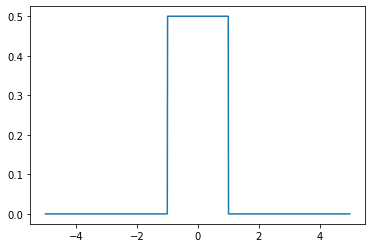

In [9]:
low = -1.0
high = 1.0

dist = distribution.Uniform(low=low, high=high)
plt.plot(xs, dist.pdf(xs), label="pdf")

## Generalized Normal distribution
- Probability density function

$$
p(x)=\frac{n\gamma}{\Gamma(1/(2n))}\exp(-\gamma^{2n}x^{2n})
$$

- parameters
    - $\mu$: location (`loc`)
    - $\gamma$: scale (`gamma`)
    - $n$: shape (`n`)

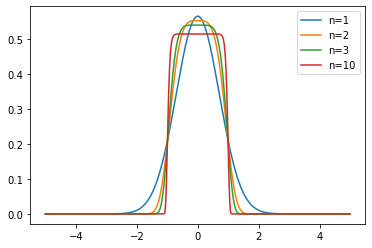

In [12]:
loc = 0.0
gamma = 1.0

for n in [1,2,3,10]:
    dist = distribution.GeneralNormal(loc=loc, gamma=gamma, n=n)
    plt.plot(xs, dist.pdf(xs), label=f"n={n}")
plt.legend()

## Generalized Cauchy distribution
- Probability density function

$$
p(x)=\frac{n\sin(\pi/(2n))}{\pi}\frac{\gamma^{2n-1}}{x^{2n}+\gamma^{2n}}
$$

- parameters
    - $\mu$: location (`loc`)
    - $\gamma$: scale (`gamma`)
    - $n$: shape (`n`)

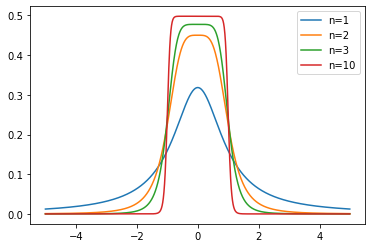

In [13]:
loc = 0.0
gamma = 1.0

for n in [1,2,3,10]:
    dist = distribution.GeneralCauchy(loc=loc, gamma=gamma, n=n)
    plt.plot(xs, dist.pdf(xs), label=f"n={n}")
plt.legend()

## Muliplied Cauchy distribution
- Probability density function

$$
p(x)=\frac{C}{[(x-\Omega)^{2}+\gamma_{1}^{2}][(x+\Omega)^{2}+\gamma_{2}^{2}]}
$$

  where $C$ is a normalization constant $C = \frac{\gamma_{1}\gamma_{2}[(\gamma_{1}+\gamma_{2})^{2}+4\Omega^{2}]}{\pi(\gamma_{1}+\gamma_{2})}$

- parameters
    - $\Omega$: location (`Omega`)
    - $\gamma_{1}$: scale (`gamma1`)
    - $\gamma_{2}$: scale (`gamma2`)

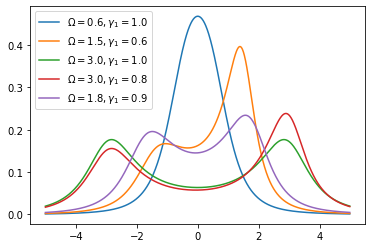

In [17]:
# Omega, gamma1, gamma2
params = [
    (0.6, 1.0, 1.0), (1.5, 0.6, 1.0), (3.0, 1.0, 1.0),
    (3.0, 0.8, 1.0), (1.8, 0.9, 1.0)
]
for Omega, gamma1, gamma2 in params:
    dist = distribution.CauchyMultiply(Omega=Omega, gamma1=gamma1, gamma2=gamma2)
    plt.plot(xs, dist.pdf(xs), label=rf"$\Omega={Omega}, \gamma_{1}={gamma1}$")
plt.legend()